In [1]:
# import thư viện
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

## TRON Dataset

In [2]:
# Đọc và xử lý dữ liệu
file_path = "C:\\Users\\asus\\Downloads\\PTDLKD_GIT\\IS403_O22_HTCL_12\\Dataset\\TRON Historical Data.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_values('Date', inplace=True)

### Chia 7:3

In [3]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.7)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

### Chia 8:2

In [9]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.8)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

### Chia 9:1

In [15]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.9)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

In [16]:
# Chuẩn bị dữ liệu
dataset_train = train_data.Price.values.reshape(-1, 1)
dataset_test = test_data.Price.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.transform(dataset_test)

# Tạo tập dữ liệu huấn luyện
X_train, y_train = [], []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Chuẩn bị dữ liệu kiểm tra
last_50_days_train = scaled_train[-50:]
full_test_input = np.concatenate((last_50_days_train, scaled_test), axis=0)
X_test = []
for i in range(50, len(full_test_input)):
    X_test.append(full_test_input[i-50:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# Khởi tạo và huấn luyện mô hình RNN
regressor = Sequential()
regressor.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dense(1, activation=None))

regressor.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1013
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8250e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5708e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7042e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1014e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8632e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8069e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5697e-04
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8713e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4438e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3128e-04
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0910e-04
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2573e-04
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━

In [18]:
# Dự đoán với dữ liệu kiểm tra
y_RNN = regressor.predict(X_test)

# Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(days, last_X):
    future_dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days, freq='D')
    y_future = []
    
    for date in future_dates:
        next_y = regressor.predict(last_X.reshape(1, -1, 1))
        y_future.append(next_y[0, 0])
        last_X = np.append(last_X[1:], next_y)
        
    y_future = np.array(y_future).reshape(-1, 1)
    y_future_scaled = scaler.inverse_transform(y_future)
    
    return future_dates, y_future_scaled

# Lấy giá trị cuối cùng của X_test làm điểm bắt đầu cho dự đoán
last_X = X_test[-1]

# Dự đoán cho 30 ngày tiếp theo
future_dates_30, y_RNN_30 = predict_future(30, last_X)
# Dự đoán cho 60 ngày tiếp theo sau 30 ngày dự đoán đầu tiên
future_dates_60, y_RNN_60 = predict_future(60, last_X)
# Dự đoán cho 90 ngày tiếp theo sau 60 ngày dự đoán đầu tiên
future_dates_90, y_RNN_90 = predict_future(90, last_X)

# Chuyển đổi các giá trị dự đoán về giá trị gốc
y_RNN_O = scaler.inverse_transform(y_RNN)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━

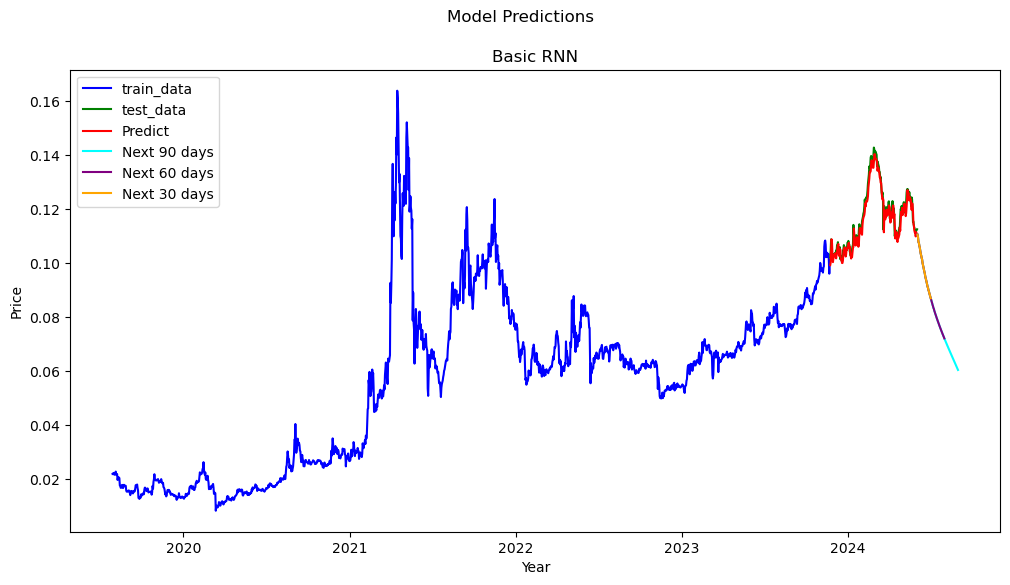

In [19]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Model Predictions')

ax.plot(train_data.index[150:], train_data.Price[150:], label="train_data", color="b")
ax.plot(test_data.index, test_data.Price, label="test_data", color="g")
ax.plot(test_data.index, y_RNN_O, label="Predict", color="red")
ax.plot(future_dates_90, y_RNN_90, label="Next 90 days", color="cyan")
ax.plot(future_dates_60, y_RNN_60, label="Next 60 days", color="purple")
ax.plot(future_dates_30, y_RNN_30, label="Next 30 days", color="orange")

ax.legend()
ax.set_title("Basic RNN")
ax.set_xlabel("Year")
ax.set_ylabel("Price")

plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data.Price, y_RNN_O))
mape = mean_absolute_percentage_error(test_data.Price, y_RNN_O) * 100
mse = mean_squared_error(test_data.Price, y_RNN_O)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 0.002620786457269852
MAPE: 1.740610058091267 %
MSE: 6.868521654609063e-06


## BNB Dataset

In [21]:
# Đọc và xử lý dữ liệu
file_path = "C:\\Users\\asus\\Downloads\\PTDLKD_GIT\\IS403_O22_HTCL_12\\Dataset\\BNB Historical Data.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_values('Date', inplace=True)

### Chia 7:3

In [22]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.7)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

### Chia 8:2

In [30]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.8)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

### Chia 9:1

In [36]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.9)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

In [37]:
# Chuẩn bị dữ liệu
dataset_train = train_data.Price.values.reshape(-1, 1)
dataset_test = test_data.Price.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.transform(dataset_test)

# Tạo tập dữ liệu huấn luyện
X_train, y_train = [], []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Chuẩn bị dữ liệu kiểm tra
last_50_days_train = scaled_train[-50:]
full_test_input = np.concatenate((last_50_days_train, scaled_test), axis=0)
X_test = []
for i in range(50, len(full_test_input)):
    X_test.append(full_test_input[i-50:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
# Khởi tạo và huấn luyện mô hình RNN
regressor = Sequential()
regressor.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dense(1, activation=None))

regressor.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1556
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6154e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9590e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6016e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2616e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010   
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5386e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8229e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5170e-04
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8396e-04
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2702e-04
Epoch 15/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [39]:
# Dự đoán với dữ liệu kiểm tra
y_RNN = regressor.predict(X_test)

# Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(days, last_X):
    future_dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days, freq='D')
    y_future = []
    
    for date in future_dates:
        next_y = regressor.predict(last_X.reshape(1, -1, 1))
        y_future.append(next_y[0, 0])
        last_X = np.append(last_X[1:], next_y)
        
    y_future = np.array(y_future).reshape(-1, 1)
    y_future_scaled = scaler.inverse_transform(y_future)
    
    return future_dates, y_future_scaled

# Lấy giá trị cuối cùng của X_test làm điểm bắt đầu cho dự đoán
last_X = X_test[-1]

# Dự đoán cho 30 ngày tiếp theo
future_dates_30, y_RNN_30 = predict_future(30, last_X)
# Dự đoán cho 60 ngày tiếp theo sau 30 ngày dự đoán đầu tiên
future_dates_60, y_RNN_60 = predict_future(60, last_X)
# Dự đoán cho 90 ngày tiếp theo sau 60 ngày dự đoán đầu tiên
future_dates_90, y_RNN_90 = predict_future(90, last_X)

# Chuyển đổi các giá trị dự đoán về giá trị gốc
y_RNN_O = scaler.inverse_transform(y_RNN)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━

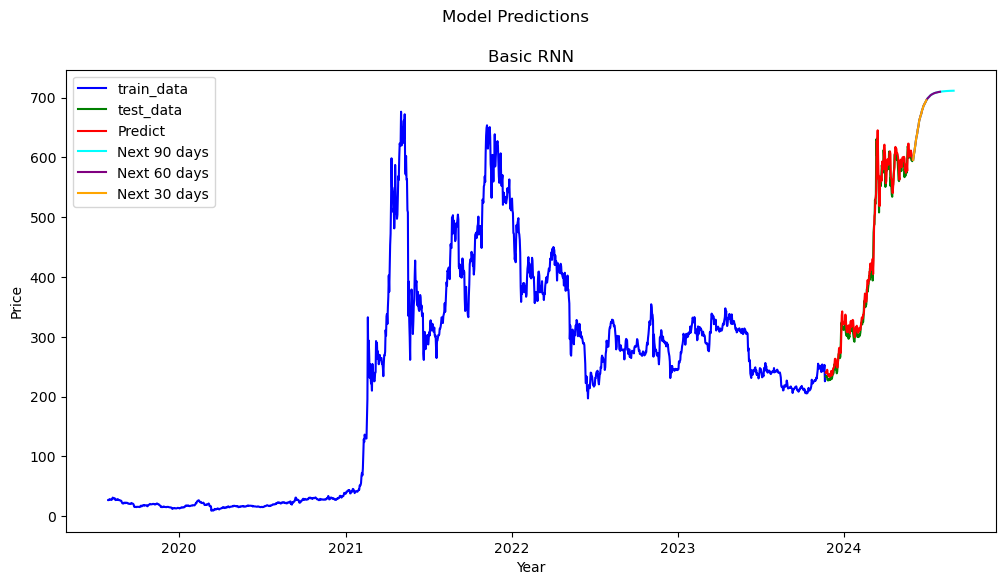

In [40]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Model Predictions')

ax.plot(train_data.index[150:], train_data.Price[150:], label="train_data", color="b")
ax.plot(test_data.index, test_data.Price, label="test_data", color="g")
ax.plot(test_data.index, y_RNN_O, label="Predict", color="red")
ax.plot(future_dates_90, y_RNN_90, label="Next 90 days", color="cyan")
ax.plot(future_dates_60, y_RNN_60, label="Next 60 days", color="purple")
ax.plot(future_dates_30, y_RNN_30, label="Next 30 days", color="orange")

ax.legend()
ax.set_title("Basic RNN")
ax.set_xlabel("Year")
ax.set_ylabel("Price")

plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data.Price, y_RNN_O))
mape = mean_absolute_percentage_error(test_data.Price, y_RNN_O) * 100
mse = mean_squared_error(test_data.Price, y_RNN_O)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 16.677187985236497
MAPE: 2.9537988513273183 %
MSE: 278.1285990949166


## Dogecoin Dataset

In [55]:
# Đọc và xử lý dữ liệu
file_path = "C:\\Users\\asus\\Downloads\\PTDLKD_GIT\\IS403_O22_HTCL_12\\Dataset\\Dogecoin Historical Data.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_values('Date', inplace=True)

### Chia 7:3

In [43]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.7)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

### Chia 8:2

In [56]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.8)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

### Chia 9:1

In [62]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
training_data_len = math.ceil(len(data) * 0.9)
train_data = data[:training_data_len].iloc[:, :2]
test_data = data[training_data_len:].iloc[:, :2]

In [63]:
# Chuẩn bị dữ liệu
dataset_train = train_data.Price.values.reshape(-1, 1)
dataset_test = test_data.Price.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.transform(dataset_test)

# Tạo tập dữ liệu huấn luyện
X_train, y_train = [], []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Chuẩn bị dữ liệu kiểm tra
last_50_days_train = scaled_train[-50:]
full_test_input = np.concatenate((last_50_days_train, scaled_test), axis=0)
X_test = []
for i in range(50, len(full_test_input)):
    X_test.append(full_test_input[i-50:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [64]:
# Khởi tạo và huấn luyện mô hình RNN
regressor = Sequential()
regressor.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dense(1, activation=None))

regressor.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0251
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3339e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6704e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8461e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2010e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1917e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9446e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6392e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9699e-04
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9015e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0867e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9528e-04
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1611e-04
Epoch 14/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6813e-04
Epoch 15/100
27/27 ━━━━━━━━━━━━

In [65]:
# Dự đoán với dữ liệu kiểm tra
y_RNN = regressor.predict(X_test)

# Dự đoán cho 30, 60, 90 ngày tiếp theo
def predict_future(days, last_X):
    future_dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days, freq='D')
    y_future = []
    
    for date in future_dates:
        next_y = regressor.predict(last_X.reshape(1, -1, 1))
        y_future.append(next_y[0, 0])
        last_X = np.append(last_X[1:], next_y)
        
    y_future = np.array(y_future).reshape(-1, 1)
    y_future_scaled = scaler.inverse_transform(y_future)
    
    return future_dates, y_future_scaled

# Lấy giá trị cuối cùng của X_test làm điểm bắt đầu cho dự đoán
last_X = X_test[-1]

# Dự đoán cho 30 ngày tiếp theo
future_dates_30, y_RNN_30 = predict_future(30, last_X)
# Dự đoán cho 60 ngày tiếp theo sau 30 ngày dự đoán đầu tiên
future_dates_60, y_RNN_60 = predict_future(60, last_X)
# Dự đoán cho 90 ngày tiếp theo sau 60 ngày dự đoán đầu tiên
future_dates_90, y_RNN_90 = predict_future(90, last_X)

# Chuyển đổi các giá trị dự đoán về giá trị gốc
y_RNN_O = scaler.inverse_transform(y_RNN)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━

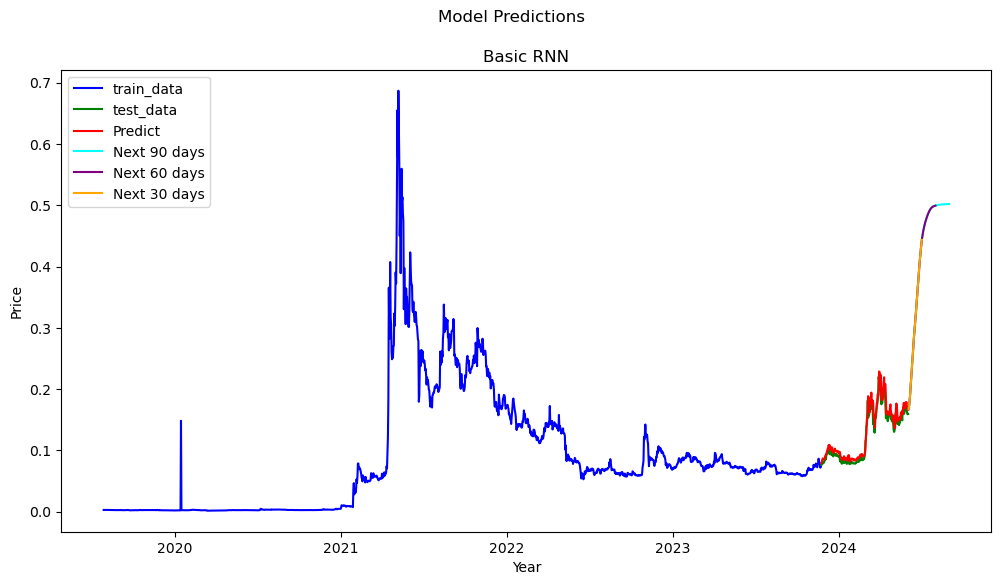

In [66]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Model Predictions')

ax.plot(train_data.index[150:], train_data.Price[150:], label="train_data", color="b")
ax.plot(test_data.index, test_data.Price, label="test_data", color="g")
ax.plot(test_data.index, y_RNN_O, label="Predict", color="red")
ax.plot(future_dates_90, y_RNN_90, label="Next 90 days", color="cyan")
ax.plot(future_dates_60, y_RNN_60, label="Next 60 days", color="purple")
ax.plot(future_dates_30, y_RNN_30, label="Next 30 days", color="orange")

ax.legend()
ax.set_title("Basic RNN")
ax.set_xlabel("Year")
ax.set_ylabel("Price")

plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data.Price, y_RNN_O))
mape = mean_absolute_percentage_error(test_data.Price, y_RNN_O) * 100
mse = mean_squared_error(test_data.Price, y_RNN_O)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 0.010855904314998688
MAPE: 7.070807801067362 %
MSE: 0.00011785065849640715
